In [2]:
# Model validation

from sklearn.model_selection import train_test_split  # Correct import
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits

# Load the dataset
digits = load_digits()
X = digits.data
y = digits.target

# Split the data with 50% in each set
X1, X2, y1, y2 = train_test_split(X, y, random_state=0, train_size=0.5)

# Fit the model on one set of data
model = GaussianNB()
model.fit(X1, y1)

# Evaluate the model on the second set of data
y2_model = model.predict(X2)
print("Accuracy:", accuracy_score(y2, y2_model))


Accuracy: 0.8342602892102335


In [3]:
y2_model = model.fit(X1, y1).predict(X2)
y1_model = model.fit(X2, y2).predict(X1)
accuracy_score(y1, y1_model), accuracy_score(y2, y2_model)

(0.844097995545657, 0.8342602892102335)

In [5]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, X, y, cv=5)

array([0.78055556, 0.78333333, 0.79387187, 0.8718663 , 0.80501393])

In [11]:
from sklearn.model_selection import LeaveOneOut
scores = cross_val_score(model, X, y, cv=LeaveOneOut())
scores

array([1., 1., 0., ..., 1., 1., 1.])

In [8]:
scores.mean()

0.8408458542014469

In [15]:
#Selecting the Best Model

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
    LinearRegression(**kwargs))

#et’s create some data to which we will fit our model:
import numpy as np
def make_data(N, err=1.0, rseed=1):
# randomly sample the data
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X, y
X, y = make_data(40)



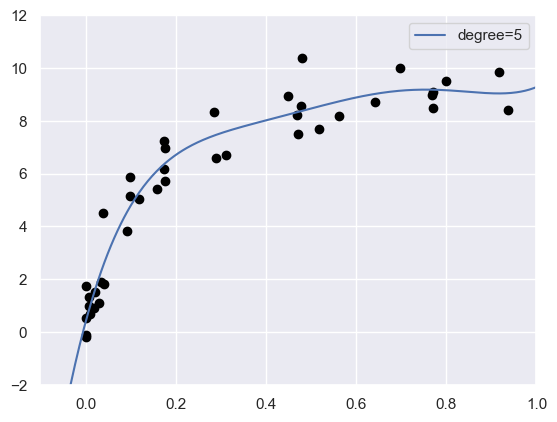

In [17]:
#We can now visualize our data, along with polynomial fits of several degrees

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set() # plot formatting
X_test = np.linspace(-0.1, 1.1, 500)[:, None]
plt.scatter(X.ravel(), y, color='black')
axis = plt.axis()
for degree in [1, 3, 5]:
    y_test = PolynomialRegression(degree).fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test, label='degree={0}'.format(degree))
plt.xlim(-0.1, 1.0)
plt.ylim(-2, 12)
plt.legend(loc='best');

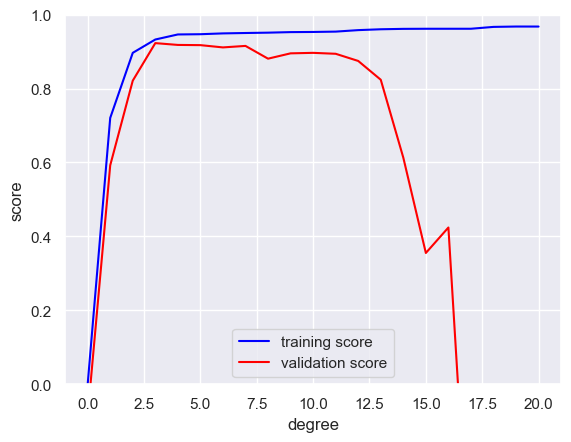

In [23]:
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve
degree = np.arange(0, 21)
#train_score, val_score = validation_curve(PolynomialRegression(), X, y,'polynomialfeatures__degree',degree, cv=7)
train_score, val_score = validation_curve(
    estimator=PolynomialRegression(),
    X=X,
    y=y,
    param_name='polynomialfeatures__degree',
    param_range=degree,
    cv=7,
    scoring='r2'
)


plt.plot(degree, np.median(train_score, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');

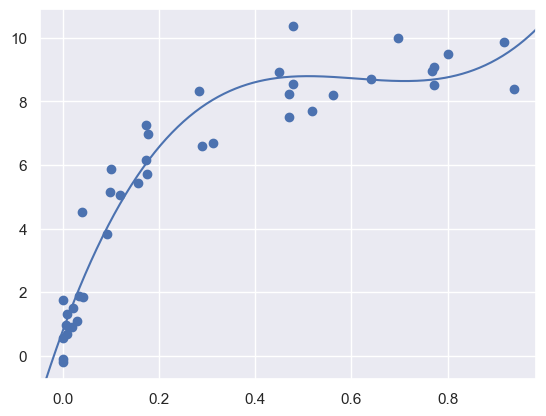

In [24]:
 plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = PolynomialRegression(3).fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test);
plt.axis(lim);

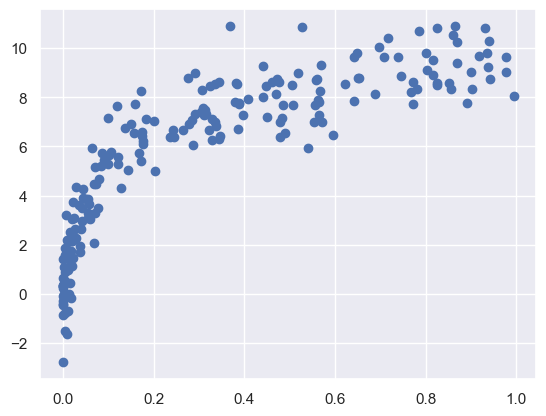

In [25]:
 X2, y2 = make_data(200)
plt.scatter(X2.ravel(), y2);

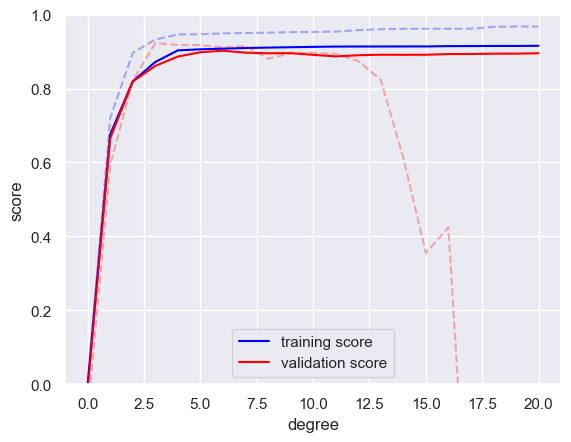

In [27]:
degree = np.arange(21)
train_score2, val_score2 = validation_curve(
    estimator=PolynomialRegression(),
    X=X2,
    y=y2,
    param_name='polynomialfeatures__degree',
    param_range=degree,
    cv=7,
    scoring='r2'
)

plt.plot(degree, np.median(train_score2, 1), color='blue',
label='training score')
plt.plot(degree, np.median(val_score2, 1), color='red', label='validation score')
plt.plot(degree, np.median(train_score, 1), color='blue', alpha=0.3,
linestyle='dashed')
plt.plot(degree, np.median(val_score, 1), color='red', alpha=0.3,
linestyle='dashed')
plt.legend(loc='lower center')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');

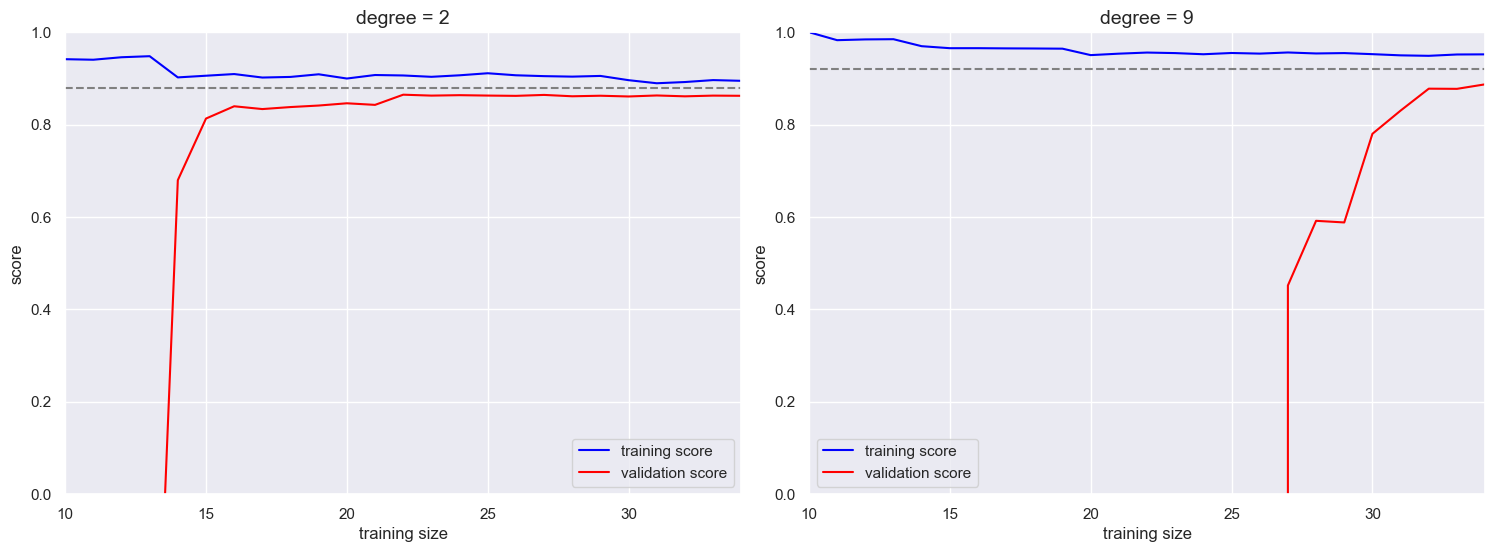

In [30]:
#Learning curves in Scikit-Learn

from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for i, degree in enumerate([2, 9]):
    N, train_lc, val_lc = learning_curve(PolynomialRegression(degree),
    X, y, cv=7,
    train_sizes=np.linspace(0.3, 1, 25))
    ax[i].plot(N, np.mean(train_lc, 1), color='blue', label='training score')
    ax[i].plot(N, np.mean(val_lc, 1), color='red', label='validation score')
    ax[i].hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1], color='gray',
    linestyle='dashed')
    ax[i].set_ylim(0, 1)
    ax[i].set_xlim(N[0], N[-1])
    ax[i].set_xlabel('training size')
    ax[i].set_ylabel('score')
    ax[i].set_title('degree = {0}'.format(degree), size=14)
    ax[i].legend(loc='best')

In [32]:
#Validation in Practice: Grid Search

from sklearn.model_selection import GridSearchCV
param_grid = {'polynomialfeatures__degree': np.arange(21),
'linearregression__fit_intercept': [True, False],
'linearregression__normalize': [True, False]}
grid = GridSearchCV(PolynomialRegression(), param_grid, cv=7)

In [1]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LinearRegression())
])

param_grid = {
    'lr__fit_intercept': [True, False]
    # Note: No 'normalize' here
}

grid = GridSearchCV(pipeline, param_grid, cv=5)
grid.fit(X, y)

print(grid.best_params_)


NameError: name 'X' is not defined

In [2]:
#Feature Engineering: Categorical features

data = [
{'price': 850000, 'rooms': 4, 'neighborhood': 'Queen Anne'},
{'price': 700000, 'rooms': 3, 'neighborhood': 'Fremont'},
{'price': 650000, 'rooms': 3, 'neighborhood': 'Wallingford'},
{'price': 600000, 'rooms': 2, 'neighborhood': 'Fremont'}
]

{'Queen Anne': 1, 'Fremont': 2, 'Wallingford': 3};

In [3]:
from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer(sparse=False, dtype=int)
vec.fit_transform(data)



array([[     0,      1,      0, 850000,      4],
       [     1,      0,      0, 700000,      3],
       [     0,      0,      1, 650000,      3],
       [     1,      0,      0, 600000,      2]])

In [5]:
vec.get_feature_names_out()


array(['neighborhood=Fremont', 'neighborhood=Queen Anne',
       'neighborhood=Wallingford', 'price', 'rooms'], dtype=object)

In [6]:
vec = DictVectorizer(sparse=True, dtype=int)
vec.fit_transform(data)

<4x5 sparse matrix of type '<class 'numpy.int32'>'
	with 12 stored elements in Compressed Sparse Row format>

In [7]:
#Text Features

sample = ['problem of evil',
'evil queen',
'horizon problem']

from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer()
X = vec.fit_transform(sample)
X

<3x5 sparse matrix of type '<class 'numpy.int64'>'
	with 7 stored elements in Compressed Sparse Row format>

In [10]:
import pandas as pd
pd.DataFrame(X.toarray(), columns=vec.get_feature_names_out())

,evil,horizon,of,problem,queen
0,1,0,1,1,0
1,1,0,0,0,1
2,0,1,0,1,0


In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()
X = vec.fit_transform(sample)
pd.DataFrame(X.toarray(), columns=vec.get_feature_names_out())

,evil,horizon,of,problem,queen
0,0.517856,0.000000,0.680919,0.517856,0.000000
1,0.605349,0.000000,0.000000,0.000000,0.795961
2,0.000000,0.795961,0.000000,0.605349,0.000000


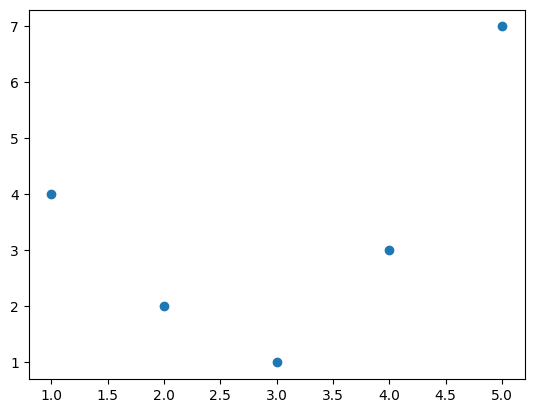

In [12]:
# Derived features

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
x = np.array([1, 2, 3, 4, 5])
y = np.array([4, 2, 1, 3, 7])
plt.scatter(x, y);

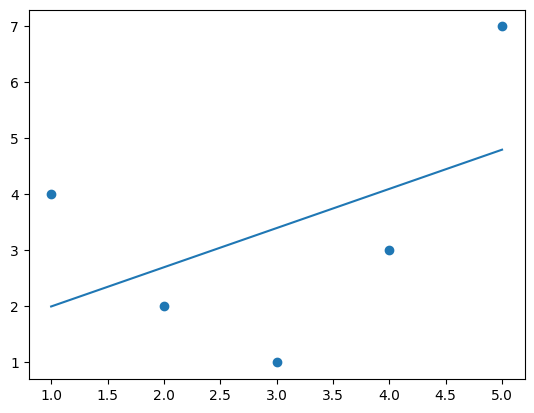

In [13]:
from sklearn.linear_model import LinearRegression
X = x[:, np.newaxis]
model = LinearRegression().fit(X, y)
yfit = model.predict(X)
plt.scatter(x, y)
plt.plot(x, yfit);

In [14]:
 from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3, include_bias=False)
X2 = poly.fit_transform(X)
print(X2)

[[  1.   1.   1.]
 [  2.   4.   8.]
 [  3.   9.  27.]
 [  4.  16.  64.]
 [  5.  25. 125.]]


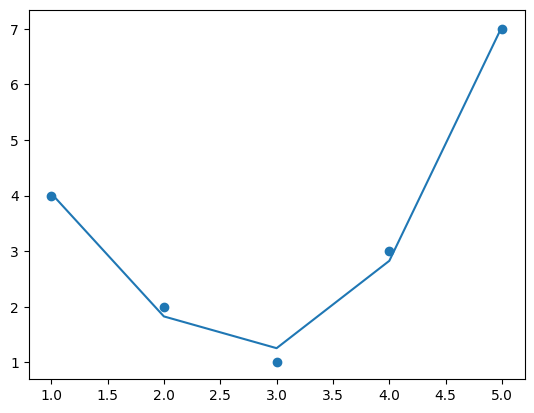

In [15]:
 model = LinearRegression().fit(X2, y)
yfit = model.predict(X2)
plt.scatter(x, y)
plt.plot(x, yfit);

In [18]:
import numpy as np
from sklearn.impute import SimpleImputer

X = np.array([[ np.nan, 0, 3 ],
              [ 3, 7, 9 ],
              [ 3, 5, 2 ],
              [ 4, np.nan, 6 ],
              [ 8, 8, 1 ]])

y = np.array([14, 16, -1, 8, -5])

# Use SimpleImputer instead of Imputer
imp = SimpleImputer(strategy='mean')
X2 = imp.fit_transform(X)

print(X2)


[[4.5 0.  3. ]
 [3.  7.  9. ]
 [3.  5.  2. ]
 [4.  5.  6. ]
 [8.  8.  1. ]]


In [19]:
model = LinearRegression().fit(X2, y)
model.predict(X2)

array([13.14869292, 14.3784627 , -1.15539732, 10.96606197, -5.33782027])

In [23]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

model = make_pipeline(
    SimpleImputer(strategy='mean'),
    PolynomialFeatures(degree=2),
    LinearRegression()
)

model.fit(X, y) # X with missing values, from above
print(y)
print(model.predict(X))


[14 16 -1  8 -5]
[14. 16. -1.  8. -5.]


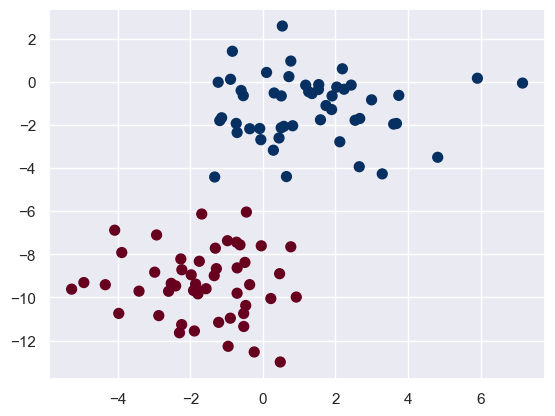

In [25]:
#In Depth: Naive Bayes Classiication

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu');

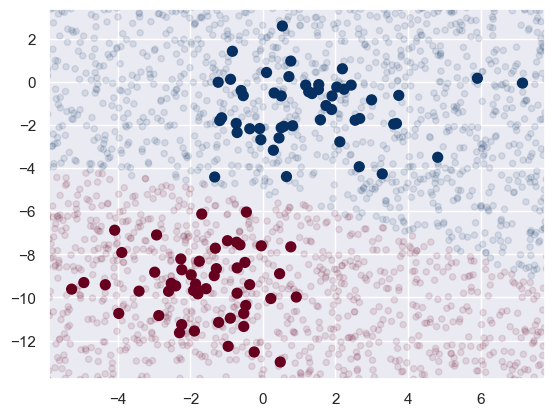

In [27]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y);

rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)
ynew = model.predict(Xnew)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha=0.1)
plt.axis(lim);

In [28]:
yprob = model.predict_proba(Xnew)
yprob[-8:].round(2)

array([[0.89, 0.11],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.15, 0.85]])

In [29]:
#Example: Classifying tex

from sklearn.datasets import fetch_20newsgroups
data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [31]:
categories = ['talk.religion.misc', 'soc.religion.christian', 'sci.space',
'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)
print(train.data[5])

From: dmcgee@uluhe.soest.hawaii.edu (Don McGee)
Subject: Federal Hearing
Originator: dmcgee@uluhe
Organization: School of Ocean and Earth Science and Technology
Distribution: usa
Lines: 10


Fact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the
use of the bible reading and prayer in public schools 15 years ago is now
going to appear before the FCC with a petition to stop the reading of the
Gospel on the airways of America.  And she is also campaigning to remove
Christmas programs, songs, etc from the public schools.  If it is true
then mail to Federal Communications Commission 1919 H Street Washington DC
20054 expressing your opposition to her request.  Reference Petition number

2493.



In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

model.fit(train.data, train.target)
labels = model.predict(test.data)

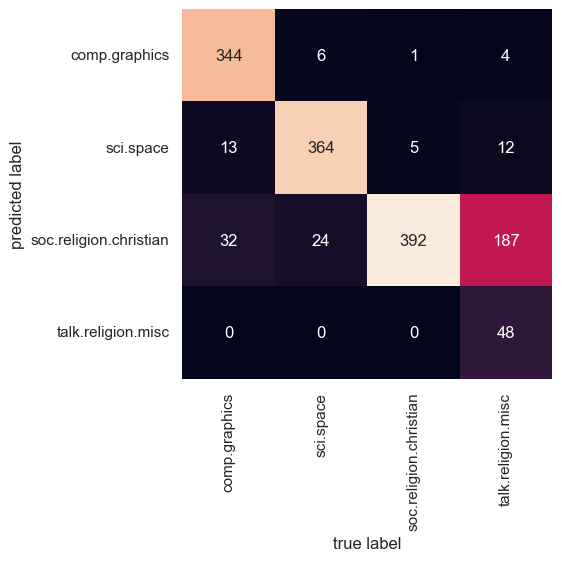

In [33]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [37]:
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

predict_category('sending a payload to the ISS'),predict_category('discussing islam vs atheism'), predict_category('determining the screen resolution')

('sci.space', 'soc.religion.christian', 'comp.graphics')

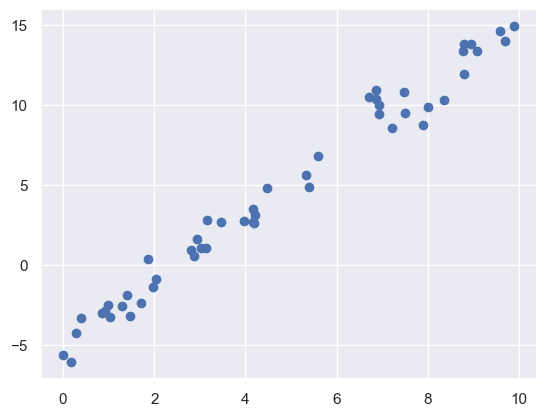

In [39]:
#In Depth: Linear Regression

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)
plt.scatter(x, y);

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model.fit(x[:, np.newaxis], y)
xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])
plt.scatter(x, y)
plt.plot(xfit, yfit);